In [13]:
import numpy as np
import sympy as sp
from Solver import *
import matplotlib.pyplot as plt

In [51]:
beam_len = 10

sp.var('x, y')
#Defining the force
point_force_pos = 3
point_force_mag = 10
point_force = point_force_mag*sp.DiracDelta(x - point_force_pos)

#Defining the moment
point_moment_pos = 5
point_moment_mag = 3
point_moment = point_moment_mag*sp.DiracDelta(x - point_moment_pos)

# let the distribute force be defined by the function f(x) = sin(x)
dist_force = sp.sin(x)\
             #+ x**2\
             #+ 5*x

total_force   = [point_force, dist_force]
total_moment  = [point_moment]
total_torques = [] # you may add if you want

r,m,t = cantilever_solver(total_moment, total_force, total_torques, x, beam_len)
reaction_force  = r*sp.DiracDelta(x)
reaction_moment = m*sp.DiracDelta(x)

total_ext_force_func = total_force + [reaction_force]
total_ext_moment_func = total_moment + [reaction_moment]

sign_conv = -1
v = sign_conv*force_sum(total_ext_force_func, x, y)
m = sign_conv*moment_sum(total_ext_moment_func, total_ext_force_func, x, y)
x_pts = np.linspace(0, beam_len, 1000)
shear_data = list_eval(v, y, x_pts) 
moment_data = list_eval(m, y, x_pts)

data = [trace_shear, trace_moment]
fig = go.Figure(
    data =data
)

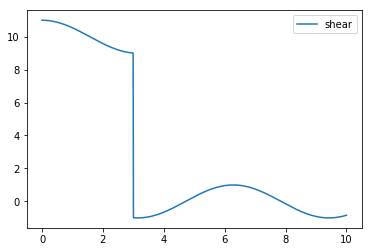

In [52]:
# Creating the shear diagram
fig, ax1 = plt.subplots()
line1, = ax1.plot(x_pts, shear_data, label='shear')
ax1.legend()
plt.show()

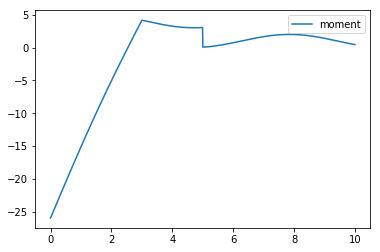

In [53]:
# creating the bending moment graph
fig, ax2 = plt.subplots()
line2, = ax2.plot(x_pts, moment_data, label='moment')
ax2.legend()
plt.show()